# K-means Clustering
K-means clustering is an **unsupervisor** learning method.
In a unsupervisored problem, there are no labels for the data. What we want to know is:
+ Determine how many groups (label 0,1,2,...) to divide the data
+ Determine which examples are belong to which group

K-means Clustering is the most wildly used method and it is simple. The K-means Clustering is implemented in a iterative way.
1. Initialize the centroids
2. Label the samples based on which centroid is the closest one.
3. Calculate the centroids using the labelled samples obtained in step 2
4. Repeat 2-3


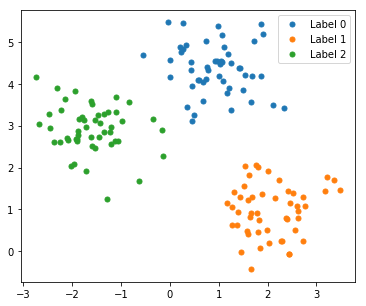

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(n_samples=150,n_features=2,centers=3,random_state=0,cluster_std=0.6)
X1 = X[:,0]
X2 = X[:,1]

idx0 = y==0
idx1 = y==1
idx2 = y==2

plt.figure(figsize=(6,5))
plt.plot(X1[idx0],X2[idx0],'.',markersize=10)
plt.plot(X1[idx1],X2[idx1],'.',markersize=10)
plt.plot(X1[idx2],X2[idx2],'.',markersize=10)
plt.legend(('Label 0','Label 1','Label 2'))
plt.show()

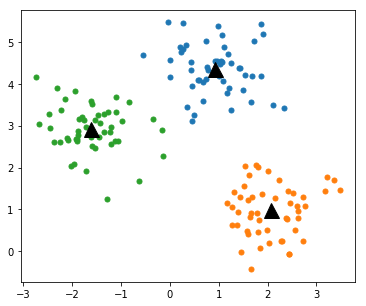

In [18]:
# implement algrithom of K means
def find_closest_centroids(X,centroids):
    n_samples = X.shape[0]
    labels = np.zeros(n_samples)
    for i in np.arange(n_samples):
        X_sample = X[i,:]
        labels[i] = np.argmin(np.sum((centroids - X_sample)**2,axis=1))
    return labels

def compute_centroids(X,labels):
    label = np.unique(labels)
    n_centroids = label.size
    centroids = np.zeros((n_centroids,2))
    for i in np.arange(n_centroids):
        centroids[i,:] = np.mean(X[labels==label[i],:],axis=0)
    return centroids

n_iters = 10
centroids = np.array([[2,0],[1,4],[-2,-1]])
for i in np.arange(n_iters):
    labels = find_closest_centroids(X,centroids)
    centroids = compute_centroids(X,labels)
    
plt.figure(figsize=(6,5))
plt.plot(X1[idx0],X2[idx0],'.',markersize=10)
plt.plot(X1[idx1],X2[idx1],'.',markersize=10)
plt.plot(X1[idx2],X2[idx2],'.',markersize=10)
plt.plot(centroids[:,0],centroids[:,1],'k^',markersize=15)    
plt.show()

## K means using sklearn
We have implement the K means algrithom using our own code. We can use some existed library which gives us faster and more general ways to use K means. Next we will apply sklearn to the same data.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

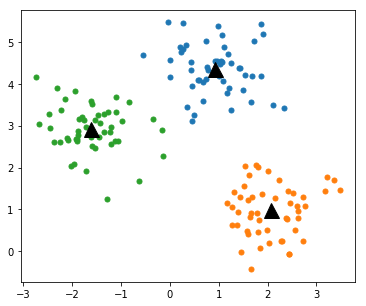

In [22]:
classifier = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001,algorithm='auto')
classifier.fit(X)

plt.figure(figsize=(6,5))
plt.plot(X1[idx0],X2[idx0],'.',markersize=10)
plt.plot(X1[idx1],X2[idx1],'.',markersize=10)
plt.plot(X1[idx2],X2[idx2],'.',markersize=10)
plt.plot(classifier.cluster_centers_[:,0],classifier.cluster_centers_[:,1],'k^',markersize=15)    
plt.show()